# Introdução

    A análise abaixo foi realizada utilizando dados disponíveis no site www.kaggle.com
    A motivação da análise é entender qual o impacto de fatores como genêro, escolaridade dos pais e ter feito um curso preparatório ou não no desempenho da prova de matemática.
    Perguntas que tentaremos responder com a análise:
    - Há uma diferença de desempenho entre os genêros?
    - Será que o desempenho na prova é impactado pela educação dos pais?
    - Ter feito o curso preparatório realmente impacta o desempenho na prova?
    Fonte do dataset: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

# Carregando bibliotecas

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
%pip install seaborn
import seaborn as sns
plt.style.use('ggplot')

# Carregando dataset

In [3]:
exams_filepath = "exams.csv"

In [4]:
examsdata = pd.read_csv(exams_filepath)

In [5]:
examsdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
examsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


Dataset com 1000 observações e sem missing

In [7]:
list(examsdata.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

# Análise exploratória

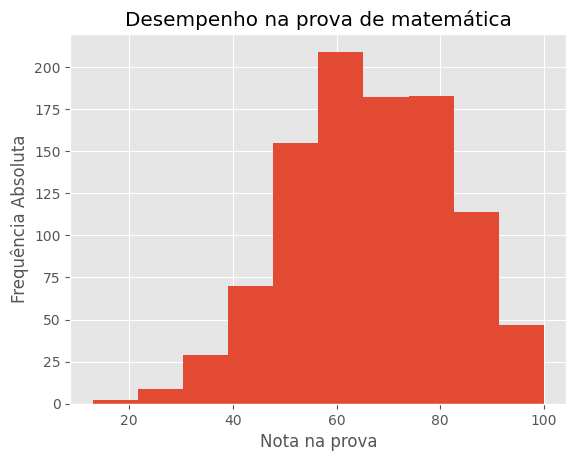

In [8]:
plt.title('Desempenho na prova de matemática')
plt.xlabel('Nota na prova')
plt.ylabel('Frequência Absoluta')
_ = plt.hist(examsdata['math score'])

    Apenas para conhecer o desempenho geral dos alunos na prova usa-se esse histograma com o qual observamos que há um certa assimetria na distribuição das observações as quais se concentram mais a partir da nota = 50 o que implica que houve mais desempenhos positivos do que negativos no geral.

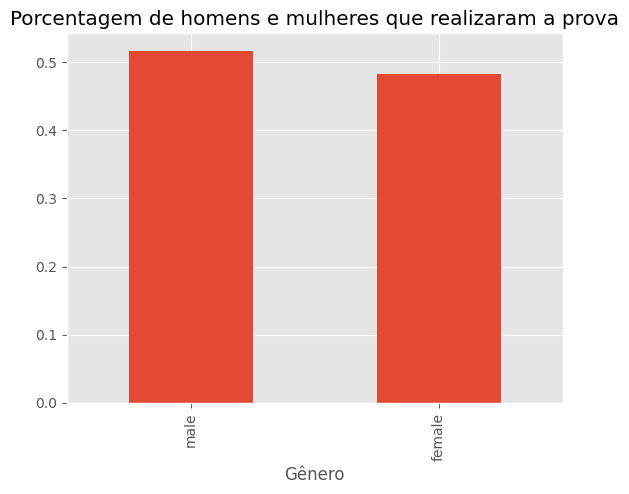

In [9]:
plt.title('Porcentagem de homens e mulheres que realizaram a prova')
plt.xlabel('Gênero')
plt.ylabel('')
_ = examsdata.gender.value_counts(1).plot.bar()

    Pode-se observar que há um certo equilíbrio no número de homens e mulheres que realizaram a prova com o número de homens sendo um pouco maior.

Estatísticas descritivas do desempenho na prova por genêro

In [10]:
examsdata.groupby('gender')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,483.0,63.196687,15.490079,13.0,53.0,63.0,75.0,100.0
male,517.0,69.384913,14.719365,29.0,59.0,70.0,79.0,100.0


    Como as obervações estão dentro dos limites da nota mínima e máxima (0 e 100), não haverá outliers muito extremos afetando significativamentes a média e o desvio-padrão. Podemos observar que curiosamente os homens tiveram uma média maior que as mulheres e as notas estão mais concentradas nesses. Cabe elaborar hipóteses do porquê há essa discrepância. É necessário também análisar os boxplots para observar a simetria e os outliers nos dados.

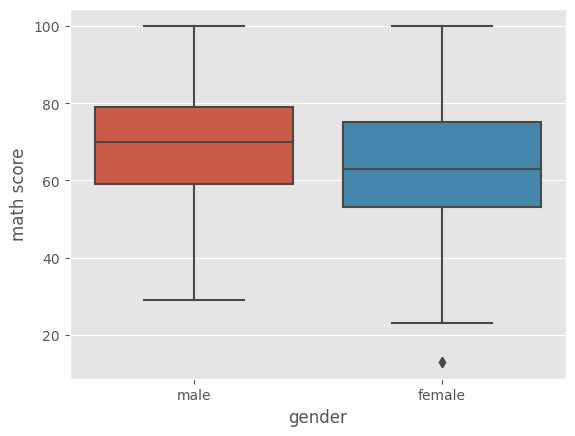

In [11]:
_ = sns.boxplot(x='gender', y = 'math score', data = examsdata)

    Como já esperado pela análise anterior as notas do gênero masculino concentram-se um pouco acima do gênero feminino, além de que a distribuição das notas do gênero masculino é mais simétrica do que a do gênero feminino.

Estatísticas descritivas do desempenho na prova para cada grau de instrução dos pais

In [12]:
examsdata.groupby('parental level of education')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,203.0,69.536946,14.098043,23.0,60.00,70.0,78.00,100.0
bachelor's degree,112.0,71.491071,15.535484,35.0,59.75,71.0,84.00,100.0
high school,202.0,65.207921,13.987071,29.0,55.00,66.0,75.00,100.0
master's degree,70.0,71.585714,14.827015,38.0,60.25,71.0,83.75,100.0
some college,222.0,65.297297,16.084108,13.0,55.00,66.0,77.00,100.0
some high school,191.0,60.701571,15.366743,25.0,50.00,60.0,71.00,97.0


    Podemos observar com as estatísticas descritivas acima que conforme a educação dos pais aumenta a média das notas dos alunos aumenta. Esse era um resultado esperado, pois há estudos que apontam exatamente essa relação. Como explicam Steven Levit e Stephen Dubner em Freakonomics pais mais instruídos tendem a ter QI mais alto o que é altamente hereditário, além de que maior instrução também está correlacionado com o nível socioeconômico, dois fatores que, segundo esses autores, impactam o desempenho nas provas. Outro fator é o estímulo e valorização do estudo que esse pais propiciam aos filhos impactando nas notas.
    Para uma melhor análise faz-se necessário boxplots.

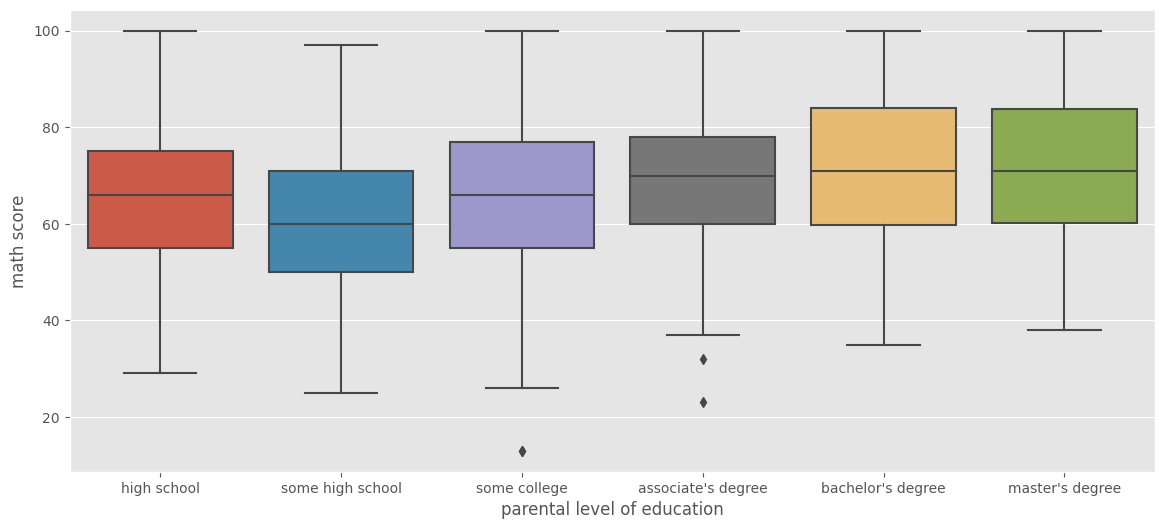

In [13]:
plt.figure(figsize=(14,6))
_ = sns.boxplot(x='parental level of education', y = 'math score', data = examsdata)

    Com os boxplots podemos observar que os dados vão se concentrando mais acima conforme a escolaridade dos pais aumenta. Inclusive nos níveis mais altos de escolaridade (bacharelado e mestrado) há um certa assimetria, com os dados entre o percentil 75 e 50 se concentrando em um subconjuntos de notas mais amplo.

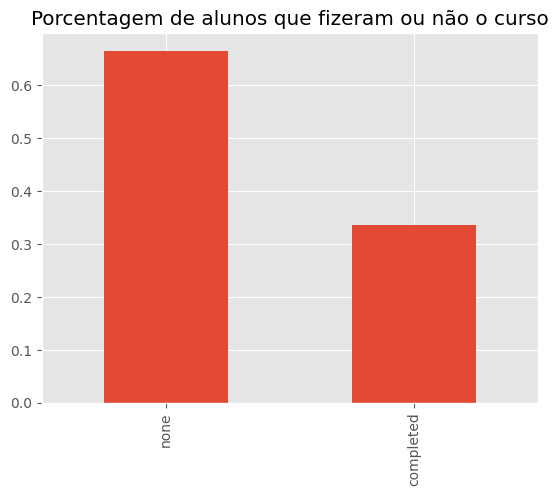

In [14]:
plt.title('Porcentagem de alunos que fizeram ou não o curso')
plt.ylabel('')
_ = examsdata['test preparation course'].value_counts(1).plot.bar()

    Observa-se do gráfico acima que mais de 60% dos alunos não realizaram curso preparatório, com a análise abaixo podemos observar se há realmente uma mudança de desempenho entre os que fizeram o curso dando a esses uma vantagem.

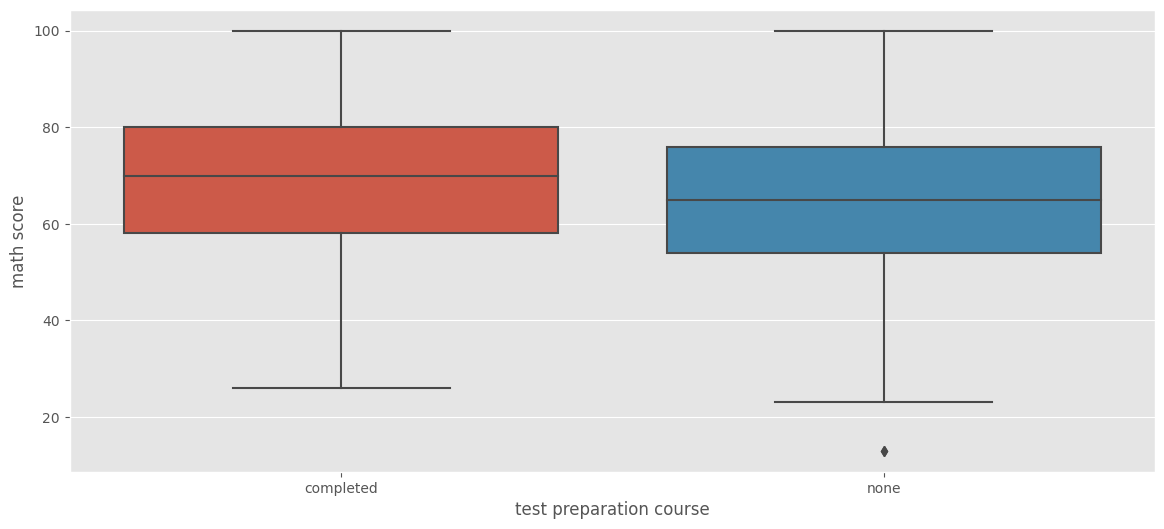

In [15]:
plt.figure(figsize=(14,6))
_ = sns.boxplot(x='test preparation course', y = 'math score', data = examsdata)

    Como é possível observar há um indício de que ter realizado o curso dá uma vantagem a esses alunos como se espera, porém, a escolaridade dos pais parece ter maior impacto, pois a diferença entre os alunos com pais de menor nível educacional e o alunos com pais de maior nível educacional é maior do que a diferença entre os que realizaram ou não o curso.

Porcentagem de alunos que fizeram curso preparatório de acordo com o grau de instrução dos pais

In [16]:
examsdata.groupby('parental level of education')['test preparation course'].value_counts(1)

parental level of education  test preparation course
associate's degree           none                       0.630542
                             completed                  0.369458
bachelor's degree            none                       0.651786
                             completed                  0.348214
high school                  none                       0.717822
                             completed                  0.282178
master's degree              none                       0.728571
                             completed                  0.271429
some college                 none                       0.630631
                             completed                  0.369369
some high school             none                       0.670157
                             completed                  0.329843
Name: test preparation course, dtype: float64

    Por último cabe analisar se há algum padrão entre o grau de escolaridade dos pais e os filhos terem feito o curso preparatório ou não. Pode-se observar que conforme a escolaridade dos pais aumenta a porcentagem dos filhos que realizaram o curso também aumenta, exceto para os pais que têm o título de mestre os quais há uma porcentagem elevada de filhos que não realizaram o curso.
    Esses alunos que os pais são mestres e como vimos têm uma média na prova mais elevada, porém, não realizaram o curso preparatório podem ter equilibrado mais a diferença de desempenho entre os que realizaram o curso preparatório ou não. Logo, faz-se necessário uma regressão linear para ponderar melhor os efeitos, porém, poderiam surgir problemas como variável omitida ou endogeneidade, pois QI é uma variável que deve afetar o desempenho na prova, porém, não há dados nesse sentido no dataset. logo, encerra-se a análise aqui.

# Conclusão

    Há indícios de que curiosamente os homens tem um desempenho em média superior às mulheres e que tanto escolaridade dos pais quanto ter feito curso preparatório afetam o desempenho na prova, porém, são sinais preliminares.